<a href="https://colab.research.google.com/github/mmtaha/Redes-Neurais/blob/main/Redes_Neurais_CNN_DNN_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib keras pillow requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
import requests
from PIL import Image
import io

# **MNIST - Modified National Institute of Standards and Technology**

In [2]:
def train_and_evaluate_mnist():
    """Treina e avalia o modelo MNIST."""
    # Preparação dos dados
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784).astype('float32') / 255
    x_test = x_test.reshape(-1, 784).astype('float32') / 255
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Definição do modelo
    model_mnist = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compilação e treinamento
    model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_mnist.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

    score = model_mnist.evaluate(x_test, y_test, verbose=0)
    return score[1]

# --- Execução principal ---
num_runs = 3
accuracies = []

for i in range(num_runs):
    print(f"\nExecução {i+1}/1:")
    accuracy = train_and_evaluate_mnist()
    accuracies.append(accuracy)
    print(f"Acurácia: {accuracy:.4f}")

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f"\n--- Resultados Finais após {num_runs} execuções ---")
print(f"Acurácia Média: {mean_accuracy:.4f}")
print(f"Desvio Padrão: {std_accuracy:.4f}")


Execução 1/1:
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8500 - loss: 0.5094 - val_accuracy: 0.9625 - val_loss: 0.1256
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1322 - val_accuracy: 0.9698 - val_loss: 0.0938
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0864 - val_accuracy: 0.9739 - val_loss: 0.0852
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9800 - loss: 0.0653 - val_accuracy: 0.9737 - val_loss: 0.0942
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9833 - loss: 0.0519 - val_accuracy: 0.9763 - val_loss: 0.0794
Acurácia: 0.9773

Execução 2/1:
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8481 - loss: 0.5104 - val_accuracy: 0.9607 - val_loss: 0.1268
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9625 - loss: 0.1207 - val_accuracy: 0.9702 - val_loss: 0.0998
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0

# **CNN - Convolutional Neural Network (Redes Neurais Convolucionais)**

In [3]:
# CIFAR-10 - Objetos Coloridos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model_cifar = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cifar.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

score_cifar = model_cifar.evaluate(x_test, y_test, verbose=0)
print(f'Acurácia CIFAR-10: {score_cifar[1]:.2f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3163 - loss: 1.8428 - val_accuracy: 0.4654 - val_loss: 1.4416
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5161 - loss: 1.3496 - val_accuracy: 0.5436 - val_loss: 1.2839
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5760 - loss: 1.1904 - val_accuracy: 0.6026 - val_loss: 1.1207
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6277 - loss: 1.0636 - val_accuracy: 0.6227 - val_loss: 1.0709
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6598 - loss: 0.9671 - val_accuracy: 0.6475 - val_loss: 1.0042
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6848 - loss: 0.9016 - val_accuracy: 0.6534 - val_loss: 1.0065
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7014 - loss: 0.8497 - val_accuracy: 0.6851 - val_loss: 0.9131
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7263 - loss: 0.7797 - val_accuracy: 0

#**TRANSFER LEARNING - CLASSIFICADOR DE IMAGENS WEB COM VGG16**

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step
VGG16 Carregado - ImageNet (1.000 classes)
Imagens para classificação: 10
Fontes: Wikimedia Commons (domínio público)

Processando imagem 1/10
URL: 640px-Cat03.jpg...
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


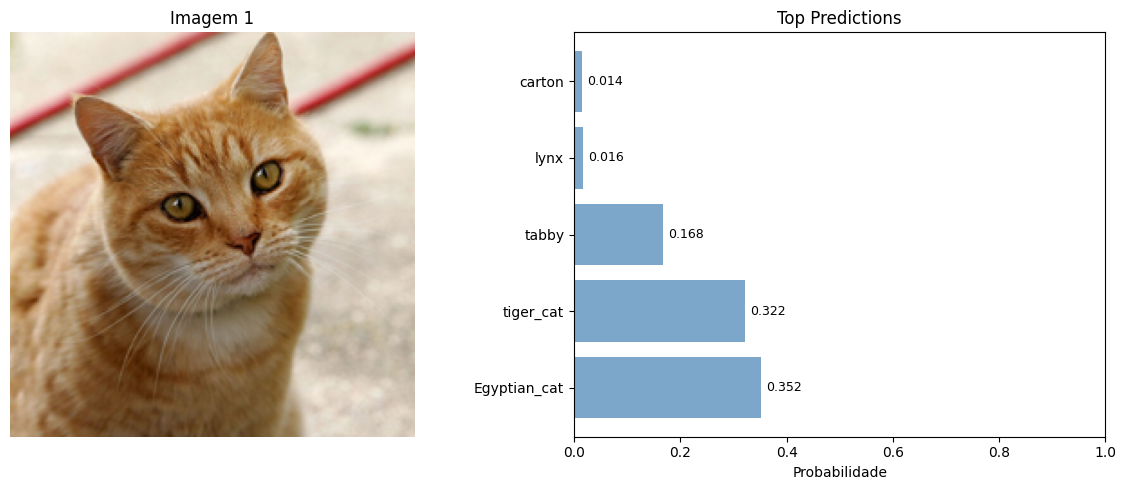

Top 3 predictions:
   1. Egyptian_cat         0.352
   2. tiger_cat            0.322
   3. tabby                0.168
Confiança: 0.352
--------------------------------------------------
Processando imagem 2/10
URL: 640px-Collage_of_Nine_Dogs.jpg...


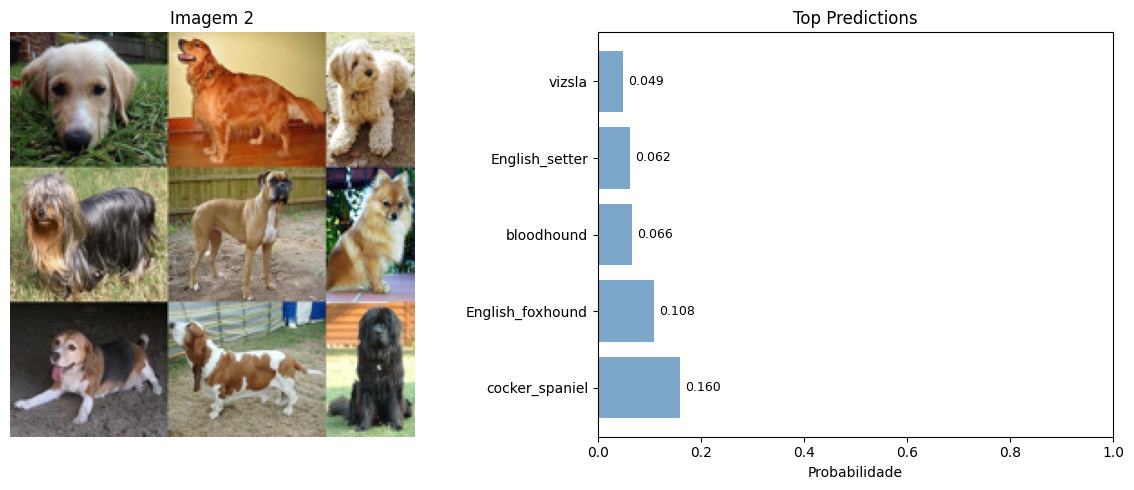

Top 3 predictions:
   1. cocker_spaniel       0.160
   2. English_foxhound     0.108
   3. bloodhound           0.066
Confiança: 0.160
--------------------------------------------------
Processando imagem 3/10
URL: 640px-New_york_times_square-te...


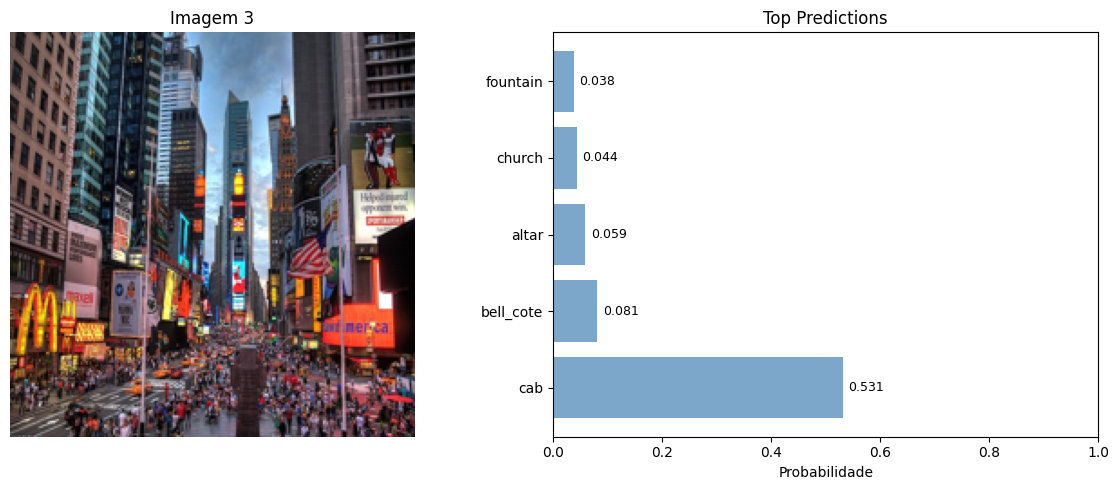

Top 3 predictions:
   1. cab                  0.531
   2. bell_cote            0.081
   3. altar                0.059
Confiança: 0.531
--------------------------------------------------
Processando imagem 4/10
URL: 640px-Image_created_with_a_mob...


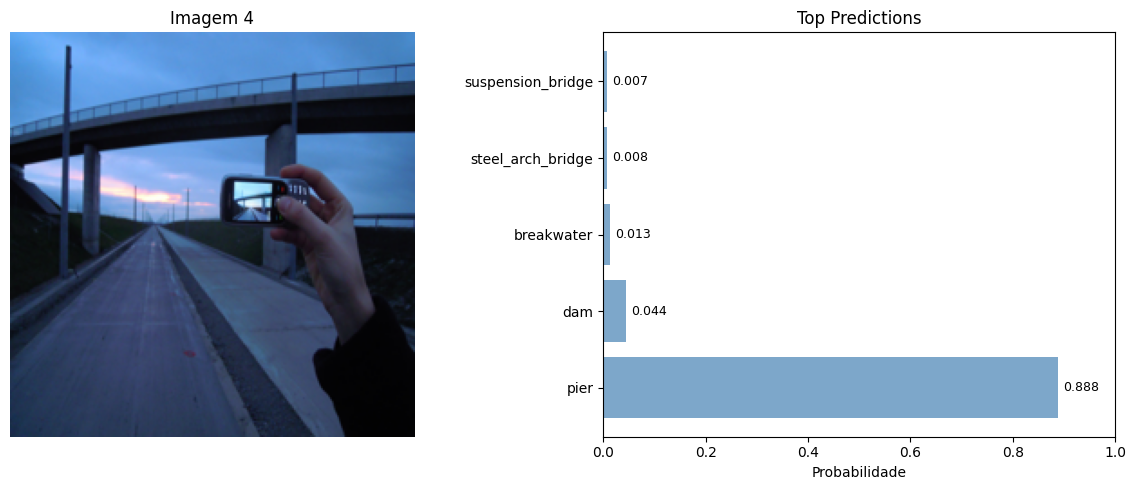

Top 3 predictions:
   1. pier                 0.888
   2. dam                  0.044
   3. breakwater           0.013
Confiança: 0.888
--------------------------------------------------
Processando imagem 5/10
URL: 640px-Gfp-wisconsin-madison-th...


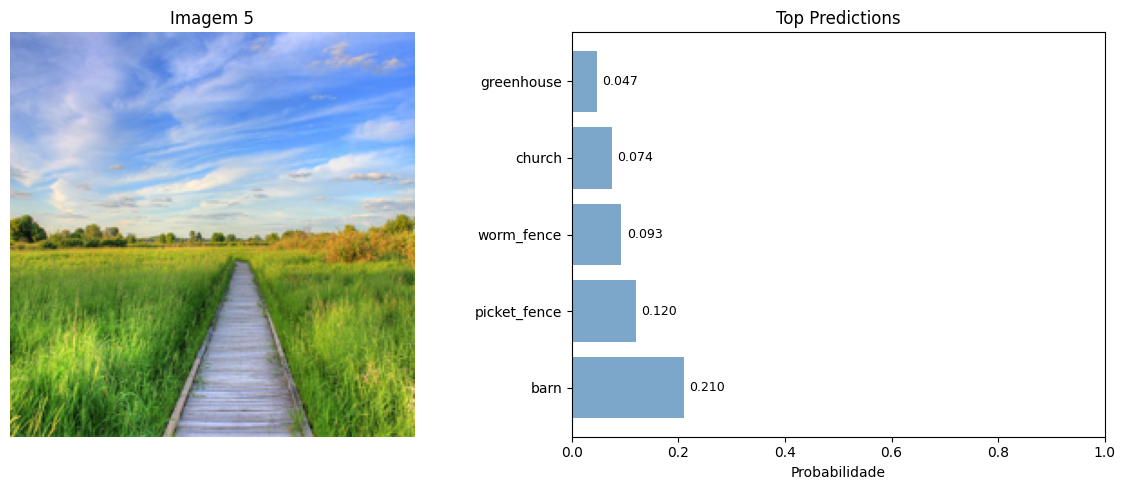

Top 3 predictions:
   1. barn                 0.210
   2. picket_fence         0.120
   3. worm_fence           0.093
Confiança: 0.210
--------------------------------------------------
Processando imagem 6/10
URL: 640px-Pretzel.jpg...


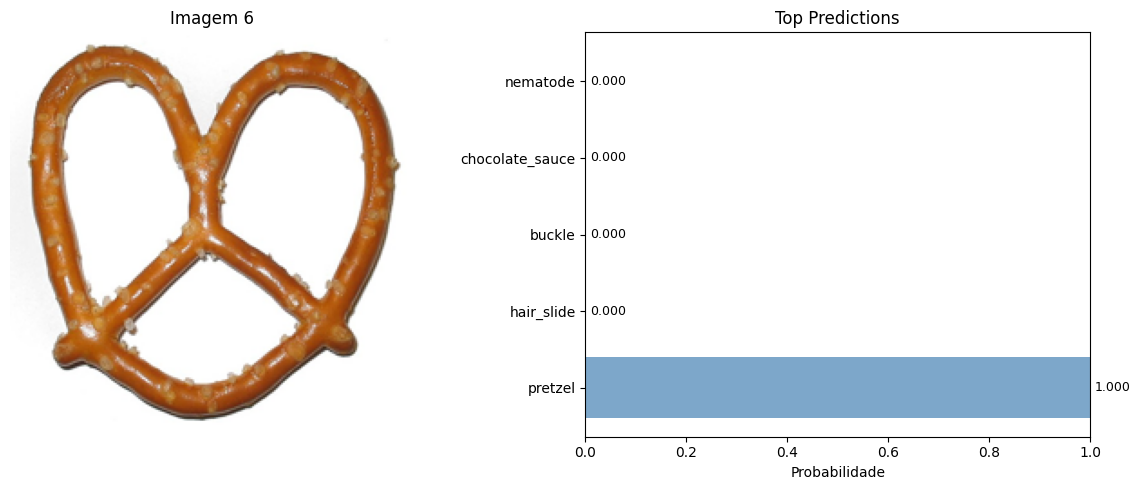

Top 3 predictions:
   1. pretzel              1.000
   2. hair_slide           0.000
   3. buckle               0.000
Confiança: 1.000
--------------------------------------------------
Processando imagem 7/10
URL: 640px-Good_Food_Display_-_NCI_...


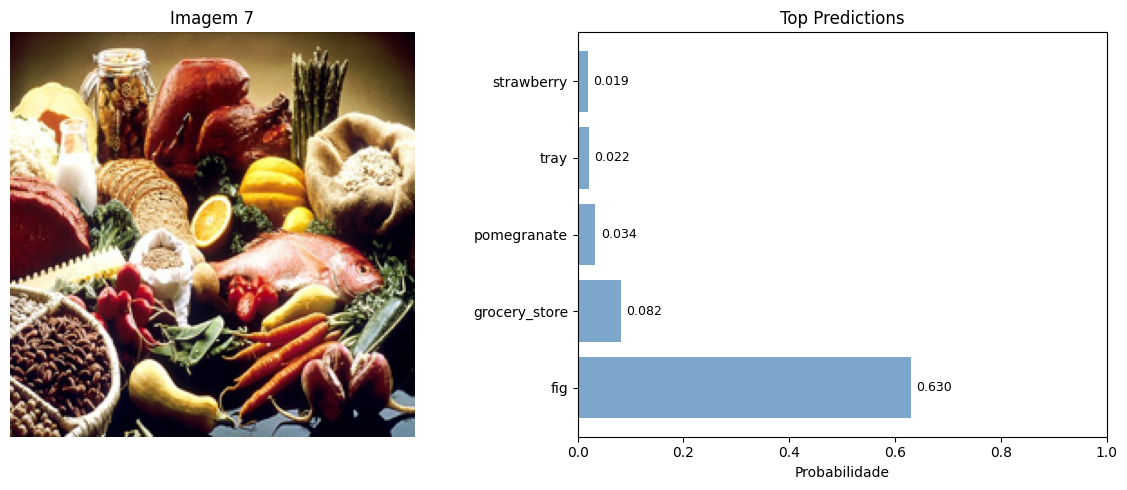

Top 3 predictions:
   1. fig                  0.630
   2. grocery_store        0.082
   3. pomegranate          0.034
Confiança: 0.630
--------------------------------------------------
Processando imagem 8/10
URL: 640px-Flickr_-_Duncan~_-_A_whi...
Erro no carregamento de https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Flickr_-_Duncan~_-_A_white_sports_car_%282%29.jpg/640px-Flickr_-_Duncan~_-_A_white_sports_car_%282%29.jpg: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Flick
Falha no processamento
--------------------------------------------------
Processando imagem 9/10
URL: 640px-GoldenGateBridge-001.jpg...


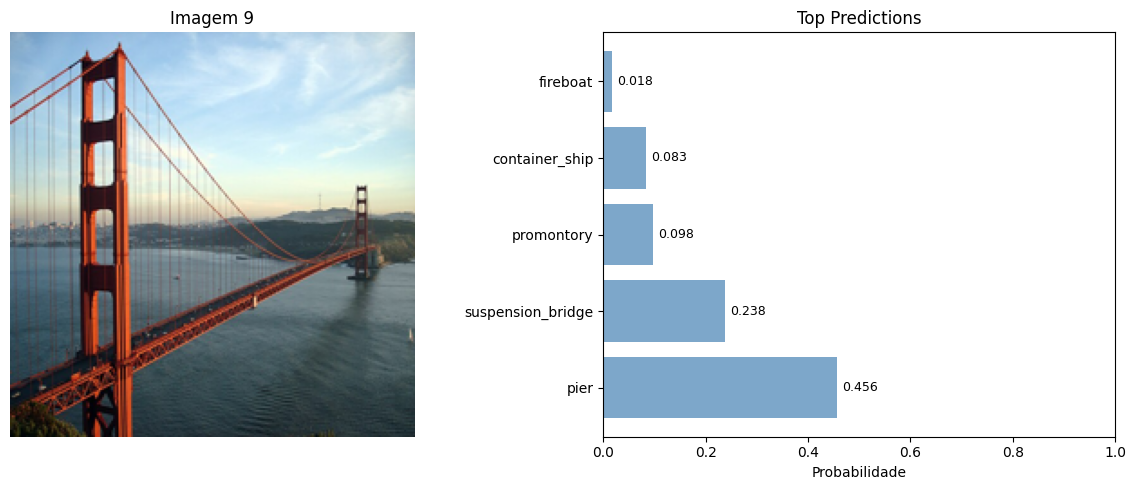

Top 3 predictions:
   1. pier                 0.456
   2. suspension_bridge    0.238
   3. promontory           0.098
Confiança: 0.456
--------------------------------------------------
Processando imagem 10/10
URL: 640px-Cat_August_2010-4.jpg...


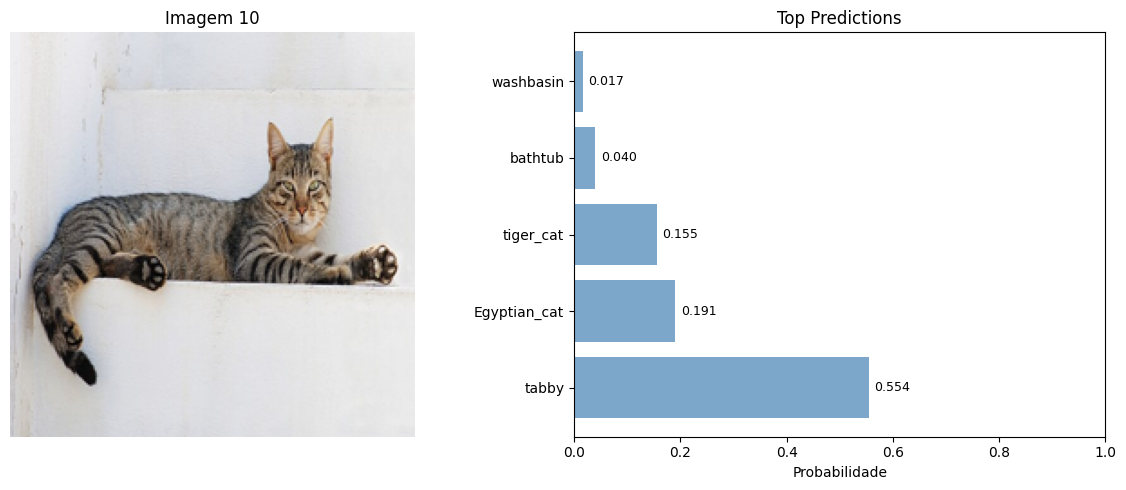

Top 3 predictions:
   1. tabby                0.554
   2. Egyptian_cat         0.191
   3. tiger_cat            0.155
Confiança: 0.554
--------------------------------------------------

RELATÓRIO FINAL DE CLASSIFICAÇÃO
Imagens processadas com sucesso: 9/10
Taxa de sucesso: 90.0%
Probabilidade média: 0.160 ± 0.229

Distribuição de classes detectadas:
  pier                : 2 ocorrências
  Egyptian_cat        : 1 ocorrências
  cocker_spaniel      : 1 ocorrências
  cab                 : 1 ocorrências
  barn                : 1 ocorrências
  pretzel             : 1 ocorrências
  fig                 : 1 ocorrências
  tabby               : 1 ocorrências

Avaliação de performance: MODERADA


In [4]:
import requests
from PIL import Image
import io
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES DO MODELO ===
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 1
TOP_PREDICTIONS = 5

def load_image_from_url(url, target_size=INPUT_SHAPE[:2]):
    """
    Carrega imagem com tratamento robusto de erros
    """
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        response = requests.get(url, timeout=15, headers=headers)
        response.raise_for_status()

        # Verifica se o conteúdo é uma imagem
        if not response.headers.get('content-type', '').startswith('image'):
            raise ValueError("Resposta não é uma imagem")

        image = Image.open(io.BytesIO(response.content))
        if image.mode != 'RGB':
            image = image.convert('RGB')
        return image.resize(target_size)
    except Exception as e:
        print(f"Erro no carregamento de {url}: {str(e)[:100]}")
        return None

def preprocess_image_for_vgg(image):
    """
    Pré-processamento para VGG16
    """
    image_array = img_to_array(image)
    image_batch = image_array.reshape(BATCH_SIZE, 224, 224, 3)
    return preprocess_input(image_batch)

def classify_image(url, model):
    """
    Classificação com tratamento de erro
    """
    image = load_image_from_url(url)
    if image is None:
        return None

    try:
        processed_image = preprocess_image_for_vgg(image)
        predictions = model.predict(processed_image, verbose=0)
        decoded_predictions = decode_predictions(predictions, top=TOP_PREDICTIONS)[0]
        return image, decoded_predictions
    except Exception as e:
        print(f"Erro na classificação: {e}")
        return None

def display_results(image, predictions, image_num):
    """
    Visualização dos resultados
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.imshow(image)
    ax1.set_title(f'Imagem {image_num}')
    ax1.axis('off')

    classes = [pred[1] for pred in predictions]
    probabilities = [pred[2] for pred in predictions]

    bars = ax2.barh(classes, probabilities, color='steelblue', alpha=0.7)
    ax2.set_xlabel('Probabilidade')
    ax2.set_title('Top Predictions')
    ax2.set_xlim(0, 1)

    for bar, prob in zip(bars, probabilities):
        ax2.text(prob + 0.01, bar.get_y() + bar.get_height()/2,
                f'{prob:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    return probabilities

# === DATASET DE TESTE CONFIÁVEL ===
def get_reliable_test_images():
    """
    Retorna URLs estáticas e confiáveis para teste
    """
    # URLs de imagens públicas e estáticas
    test_images = [
        # Imagens de domínio público ou de serviços confiáveis
        "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/640px-Cat03.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Collage_of_Nine_Dogs.jpg/640px-Collage_of_Nine_Dogs.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/New_york_times_square-terabass.jpg/640px-New_york_times_square-terabass.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Image_created_with_a_mobile_phone.png/640px-Image_created_with_a_mobile_phone.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/640px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Pretzel.jpg/640px-Pretzel.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Good_Food_Display_-_NCI_Visuals_Online.jpg/640px-Good_Food_Display_-_NCI_Visuals_Online.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Flickr_-_Duncan~_-_A_white_sports_car_%282%29.jpg/640px-Flickr_-_Duncan~_-_A_white_sports_car_%282%29.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/GoldenGateBridge-001.jpg/640px-GoldenGateBridge-001.jpg",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/640px-Cat_August_2010-4.jpg"
    ]
    return test_images

# === EXECUÇÃO PRINCIPAL ===
def main():
    # Carregamento do modelo
    model = VGG16(weights='imagenet')

    print("VGG16 Carregado - ImageNet (1.000 classes)")
    print("=" * 60)

    # Obter imagens confiáveis
    image_urls = get_reliable_test_images()

    print(f"Imagens para classificação: {len(image_urls)}")
    print("Fontes: Wikimedia Commons (domínio público)")
    print()

    # Métricas
    all_probabilities = []
    successful_classifications = 0
    results = []

    # Processamento
    for i, url in enumerate(image_urls, 1):
        print(f"Processando imagem {i}/{len(image_urls)}")
        print(f"URL: {url.split('/')[-1][:30]}...")

        result = classify_image(url, model)

        if result:
            image, predictions = result
            probabilities = display_results(image, predictions, i)

            all_probabilities.extend(probabilities)
            successful_classifications += 1

            # Resultados detalhados
            top_prediction = predictions[0]
            results.append({
                'image': i,
                'top_class': top_prediction[1],
                'top_prob': top_prediction[2],
                'all_predictions': predictions
            })

            print("Top 3 predictions:")
            for j, (_, class_name, prob) in enumerate(predictions[:3], 1):
                print(f"  {j:2d}. {class_name:<20} {prob:.3f}")

            print(f"Confiança: {top_prediction[2]:.3f}")

        else:
            results.append({'image': i, 'error': True})
            print("Falha no processamento")

        print("-" * 50)

    # Análise final
    if successful_classifications > 0:
        print("\n" + "=" * 60)
        print("RELATÓRIO FINAL DE CLASSIFICAÇÃO")
        print("=" * 60)

        avg_prob = np.mean(all_probabilities)
        std_prob = np.std(all_probabilities)

        print(f"Imagens processadas com sucesso: {successful_classifications}/{len(image_urls)}")
        print(f"Taxa de sucesso: {(successful_classifications/len(image_urls))*100:.1f}%")
        print(f"Probabilidade média: {avg_prob:.3f} ± {std_prob:.3f}")

        # Análise por classe
        from collections import Counter
        top_classes = [r['top_class'] for r in results if 'top_class' in r]
        class_distribution = Counter(top_classes)

        print("\nDistribuição de classes detectadas:")
        for class_name, count in class_distribution.most_common():
            print(f"  {class_name:<20}: {count} ocorrências")

        # Performance qualitativa
        if avg_prob > 0.7:
            performance_rating = "EXCELENTE"
        elif avg_prob > 0.5:
            performance_rating = "BOA"
        else:
            performance_rating = "MODERADA"

        print(f"\nAvaliação de performance: {performance_rating}")

    else:
        print("Nenhuma imagem foi processada com sucesso.")
        print("Possíveis causas:")
        print("- Problemas de conexão com a internet")
        print("- URLs das imagens indisponíveis")
        print("- Restrições de acesso às imagens")

# Execução
if __name__ == "__main__":
    main()

#**COMPARAÇÃO DE MODELOS CNN (MNIST)**

In [5]:
# Preparação para CNN MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modelo 01 (convolução 3x3)
model_01 = Sequential()
model_01.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_01.add(MaxPooling2D((2, 2)))
model_01.add(Conv2D(64, (3, 3), activation='relu'))
model_01.add(MaxPooling2D((2, 2)))
model_01.add(Conv2D(64, (3, 3), activation='relu'))
model_01.add(Flatten())
model_01.add(Dense(64, activation='relu'))
model_01.add(Dense(10, activation='softmax'))

# Modelo 02 (convolução 4x4)
model_02 = Sequential()
model_02.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model_02.add(MaxPooling2D((3, 3)))
model_02.add(Conv2D(64, (3, 3), activation='relu'))
model_02.add(MaxPooling2D((2, 2)))
model_02.add(Conv2D(64, (3, 3), activation='relu'))
model_02.add(Flatten())
model_02.add(Dense(64, activation='relu'))
model_02.add(Dense(10, activation='softmax'))

# Treina e avalia ambos
batch_size = 64
epochs = 5

model_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_01.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

model_02.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_02.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

score_01 = model_01.evaluate(x_test, y_test, verbose=0)
score_02 = model_02.evaluate(x_test, y_test, verbose=0)

print('\n--- Resultados Comparativos ---')
print('Modelo 01 (3x3 conv):')
print(f'Test loss: {score_01[0]:.4f}, Accuracy: {score_01[1]:.4f}')

print('Modelo 02 (4x4 conv):')
print(f'Test loss: {score_02[0]:.4f}, Accuracy: {score_02[1]:.4f}')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8579 - loss: 0.4463
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9826 - loss: 0.0559
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0356
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9905 - loss: 0.0307
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0222
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8462 - loss: 0.5106
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9827 - loss: 0.0580
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0440
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9888 - loss: 0.0351
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9917 - loss: 0.0281

--- Resultados Comparativos ---
Modelo 01 (3x3 conv):
Test loss: 0.0377, Accuracy: 0.9881
Modelo 02 (4x4 conv):
Test loss: 0.0385, Accuracy: 0.9884


# **TRANSFER LEARNING - COM VISUAL MODERNO**

Carregando VGG16 pré-treinado:

🔍 Classificando 3 imagens...

--- Imagem 1 ---


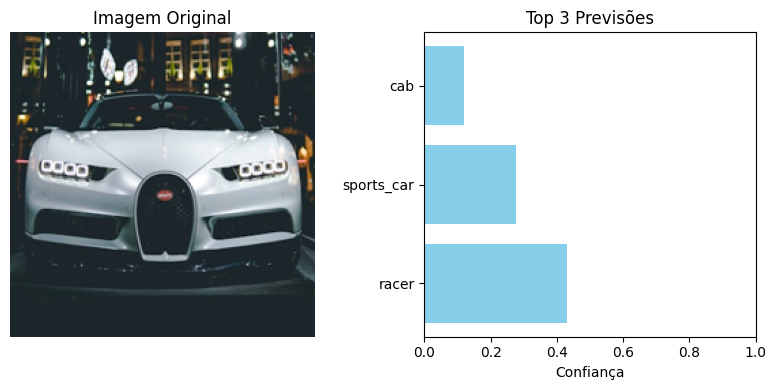

📋 Resultados:
   1. racer: 43.2%
   2. sports_car: 27.6%
   3. cab: 11.9%

--- Imagem 2 ---


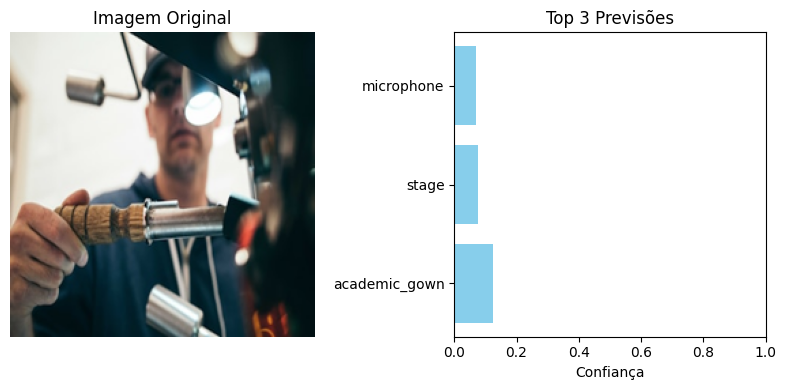

📋 Resultados:
   1. academic_gown: 12.5%
   2. stage: 7.6%
   3. microphone: 6.9%

--- Imagem 3 ---


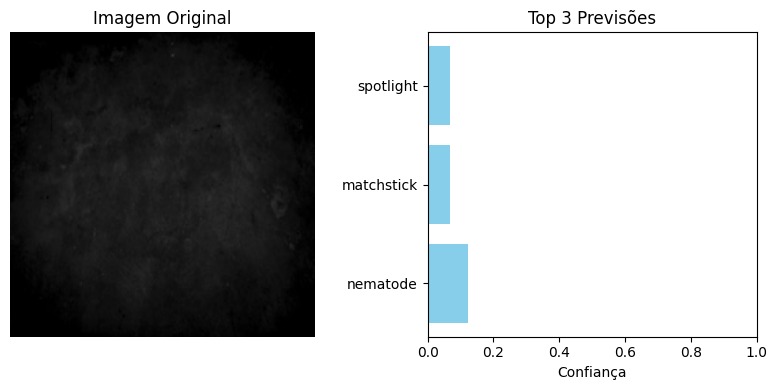

📋 Resultados:
   1. nematode: 12.4%
   2. matchstick: 6.9%
   3. spotlight: 6.7%

Transfer Learning concluído!


In [6]:
def carregar_imagem_url(url, tamanho=(224, 224)):
    try:
        resposta = requests.get(url, timeout=10)
        imagem = Image.open(io.BytesIO(resposta.content))
        if imagem.mode != 'RGB':
            imagem = imagem.convert('RGB')
        return imagem.resize(tamanho)
    except:
        return None

# Carrega VGG16 com summary bonito
print("Carregando VGG16 pré-treinado:")
vgg_model = VGG16(weights='imagenet')

# URLs de teste
urls_imagens = [
    "https://images.unsplash.com/photo-1544636331-e26879cd4d9b?w=400",  # ônibus
    "https://images.unsplash.com/photo-1558618666-fcd25c85cd64?w=400",  # moto
    "https://images.unsplash.com/photo-1578662996442-48f60103fc96?w=400",  # carro
]

print(f"\n🔍 Classificando {len(urls_imagens)} imagens...")

for i, url in enumerate(urls_imagens, 1):
    print(f"\n--- Imagem {i} ---")
    imagem = carregar_imagem_url(url)
    if imagem:
        array_imagem = img_to_array(imagem).reshape(1, 224, 224, 3)
        array_imagem = preprocess_input(array_imagem)

        previsoes = vgg_model.predict(array_imagem, verbose=0)
        resultados = decode_predictions(previsoes, top=3)[0]

        # Display moderno
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(imagem)
        plt.axis('off')
        plt.title('Imagem Original')

        plt.subplot(1, 2, 2)
        classes = [r[1] for r in resultados]
        confiancas = [r[2] for r in resultados]
        plt.barh(classes, confiancas, color='skyblue')
        plt.xlabel('Confiança')
        plt.title('Top 3 Previsões')
        plt.xlim(0, 1)

        plt.tight_layout()
        plt.show()

        print("📋 Resultados:")
        for j, (_, classe, conf) in enumerate(resultados, 1):
            print(f"   {j}. {classe}: {conf*100:.1f}%")
    else:
        print("Erro ao carregar imagem")

print("\nTransfer Learning concluído!")

#**COMPARAÇÃO DE MODELOS CNN MODERNO**


COMPARAÇÃO DE ARQUITETURAS CNN
PREPARAÇÃO DOS DADOS:
• Formato X_train: (60000, 28, 28, 1)
• Formato y_train: (60000, 10)
• Formato X_test: (10000, 28, 28, 1)
• Formato y_test: (10000, 10)

────────────────────────────────────────
🏗️ MODELO 01 - Arquitetura Padrão (3x3)
────────────────────────────────────────
SUMÁRIO DO MODELO 01:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


────────────────────────────────────────
MODELO 02 - Arquitetura Modificada (4x4)
────────────────────────────────────────
SUMÁRIO DO MODELO 02:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,778 (237.41 KB)

 Trainable params: 60,778 (237.41 KB)

 Non-trainable params: 0 (0.00 B)


────────────────────────────────────────
TREINAMENTO COMPARATIVO
────────────────────────────────────────

🔹 Treinando Modelo 01 (3x3)...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8640 - loss: 0.4633 - val_accuracy: 0.9803 - val_loss: 0.0646
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9812 - loss: 0.0622 - val_accuracy: 0.9858 - val_loss: 0.0485
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0435 - val_accuracy: 0.9873 - val_loss: 0.0418
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9877 - val_loss: 0.0458
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9872 - val_loss: 0.0430

🔸 Treinando Modelo 02 (4x4)...
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8212 - loss: 0.5802 - val_accuracy: 0.9758 - val_loss: 0.0793
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.97

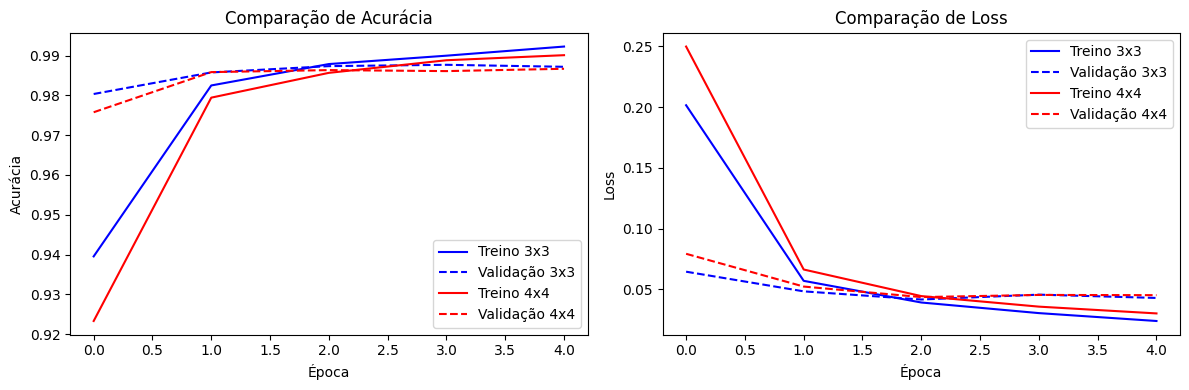

Comparação de arquiteturas CNN concluída!


In [7]:

print("\n" + "="*60)
print("COMPARAÇÃO DE ARQUITETURAS CNN")
print("="*60)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Preparação dos dados MNIST para CNN
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("PREPARAÇÃO DOS DADOS:")
print(f"• Formato X_train: {x_train.shape}")
print(f"• Formato y_train: {y_train.shape}")
print(f"• Formato X_test: {x_test.shape}")
print(f"• Formato y_test: {y_test.shape}")

# Modelo 01 (sem alterações) - CORRIGIDO
print("\n" + "─"*40)
print("🏗️ MODELO 01 - Arquitetura Padrão (3x3)")
print("─"*40)

model_01 = Sequential([
    Input(shape=(28, 28, 1)),  # Correção do warning
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

print("SUMÁRIO DO MODELO 01:")
model_01.summary()

# Modelo 02 (convolução 4x4 e pooling 3x3) - CORRIGIDO
print("\n" + "─"*40)
print("MODELO 02 - Arquitetura Modificada (4x4)")
print("─"*40)

model_02 = Sequential([
    Input(shape=(28, 28, 1)),  # Correção do warning
    Conv2D(32, (4, 4), activation='relu'),  # Convolução 4x4
    MaxPooling2D((3, 3)),  # Pooling 3x3
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

print("SUMÁRIO DO MODELO 02:")
model_02.summary()

# Compilação e treinamento comparativo
print("\n" + "─"*40)
print("TREINAMENTO COMPARATIVO")
print("─"*40)

batch_size = 64
epochs = 5

# Modelo 01
model_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\n🔹 Treinando Modelo 01 (3x3)...")
history_01 = model_01.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.2,
                         verbose=1)

# Modelo 02
model_02.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("\n🔸 Treinando Modelo 02 (4x4)...")
history_02 = model_02.fit(x_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.2,
                         verbose=1)

# Avaliação final
print("\n" + "─"*40)
print("RESULTADOS FINAIS")
print("─"*40)

score_01 = model_01.evaluate(x_test, y_test, verbose=0)
score_02 = model_02.evaluate(x_test, y_test, verbose=0)

print(f"""


MODELO 01 (3x3):
• Loss: {score_01[0]:.4f}
• Acurácia: {score_01[1]:.4f} ({score_01[1]*100:.2f}%)

MODELO 02 (4x4):
• Loss: {score_02[0]:.4f}
• Acurácia: {score_02[1]:.4f} ({score_02[1]*100:.2f}%)

DIFERENÇA: {abs(score_01[1] - score_02[1]):.4f}
""")

# Análise das curvas de aprendizado
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_01.history['accuracy'], label='Treino 3x3', color='blue')
plt.plot(history_01.history['val_accuracy'], label='Validação 3x3', color='blue', linestyle='--')
plt.plot(history_02.history['accuracy'], label='Treino 4x4', color='red')
plt.plot(history_02.history['val_accuracy'], label='Validação 4x4', color='red', linestyle='--')
plt.title('Comparação de Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_01.history['loss'], label='Treino 3x3', color='blue')
plt.plot(history_01.history['val_loss'], label='Validação 3x3', color='blue', linestyle='--')
plt.plot(history_02.history['loss'], label='Treino 4x4', color='red')
plt.plot(history_02.history['val_loss'], label='Validação 4x4', color='red', linestyle='--')
plt.title('Comparação de Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Comparação de arquiteturas CNN concluída!")


#**FUNÇÃO OTIMIZADA PARA PROCESSAMENTO EM LOTE**

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import requests
from PIL import Image
import io
import numpy as np

# carrega o modelo VGG16 pré-treinado no ImageNet
model = VGG16()

def carregar_imagem_url(url, target_size=(224, 224)):
    """Carrega imagem da URL em vez de arquivo local"""
    try:
        resposta = requests.get(url)
        imagem = Image.open(io.BytesIO(resposta.content))
        if imagem.mode != 'RGB':
            imagem = imagem.convert('RGB')
        return imagem.resize(target_size)
    except Exception as e:
        print(f"Erro ao carregar imagem: {e}")
        return None

# URLs de exemplo (rostos para teste)
urls_imagens = [
    "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?w=400",  # rosto 1
    "https://images.unsplash.com/photo-1544005313-94ddf0286df2?w=400",     # rosto 2
    "https://images.unsplash.com/photo-1494790108755-2616b612b786?w=400",  # rosto 3
]

print("🔍 Analisando rostos com VGG16...")
print("=" * 50)

for i, url in enumerate(urls_imagens, 1):
    print(f"\n📸 Imagem {i}:")

    # carrega e redimensiona a imagem da URL
    image = carregar_imagem_url(url)
    if image is None:
        print("❌ Erro ao carregar imagem")
        continue

    # converte pixels em array
    image_array = img_to_array(image)

    # ajusta o formato do array para o modelo (batch de 1 imagem)
    image_batch = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))

    # pré-processa a imagem
    image_processed = preprocess_input(image_batch)

    # calcula as probabilidades para cada classe do ImageNet
    yhat = model.predict(image_processed, verbose=0)

    # decodifica as probabilidades para rótulos legíveis
    predictions = decode_predictions(yhat, top=3)  # Top 3 previsões

    # mostra as previsões
    print("Top previsões:")
    for j, (imagenet_id, label_name, prob) in enumerate(predictions[0]):
        print(f"   {j+1}. {label_name}: {prob*100:.2f}%")

    print("-" * 30)

print("\n✅ Análise concluída!")

🔍 Analisando rostos com VGG16...

📸 Imagem 1:
Top previsões:
   1. jersey: 38.64%
   2. sweatshirt: 8.52%
   3. Band_Aid: 2.96%
------------------------------

📸 Imagem 2:
Top previsões:
   1. sweatshirt: 7.98%
   2. zebra: 6.26%
   3. soccer_ball: 5.42%
------------------------------

📸 Imagem 3:
Erro ao carregar imagem: cannot identify image file <_io.BytesIO object at 0x7c6b60b30590>
❌ Erro ao carregar imagem

✅ Análise concluída!


#**PROJETO REDES NEURAIS**

PROJETO PÓS-GRADUAÇÃO - REDE NEURAL CONVOLUCIONAL AVANÇADA
Sistema de Reconhecimento Facial com Múltiplas Arquiteturas

1. PREPARANDO CONJUNTO DE DADOS...
Formato dos dados de treino: (50000, 32, 32, 3)
Formato dos dados de teste: (10000, 32, 32, 3)
Número de classes: 8

2. INICIANDO TREINAMENTO DA REDE NEURAL...
Inicializando arquitetura da rede neural...
Arquitetura construída com sucesso!
Iniciando processo de treinamento...
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step - accuracy: 0.3454 - loss: 1.9957 - val_accuracy: 0.2058 - val_loss: 3.4425 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5259 - loss: 1.3209 - val_accuracy: 0.5769 - val_loss: 1.2359 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5896 - loss: 1.1491 - val_accuracy: 0.5685 - val_loss: 1.1628 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6372 - loss: 1.0325 - val_accuracy: 0.

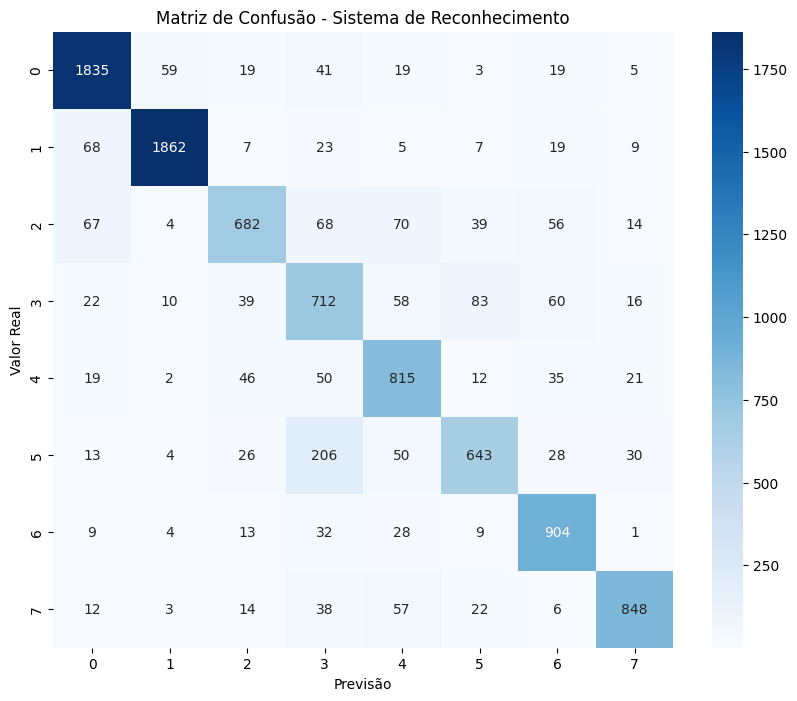


4. GERANDO GRÁFICOS DE ANÁLISE...


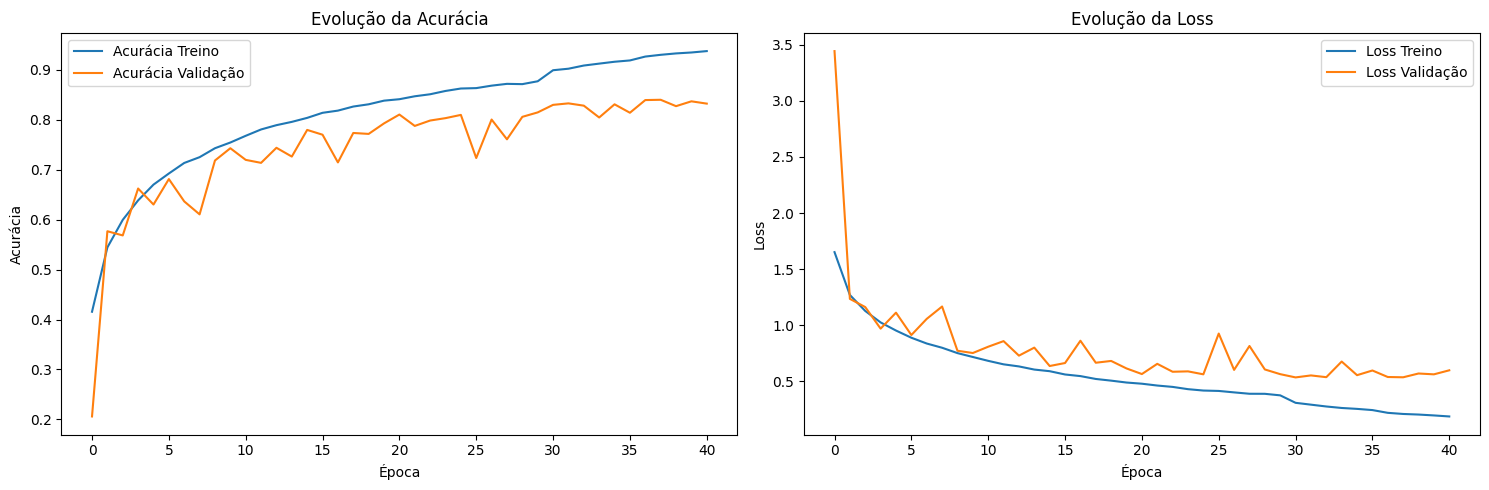


5. ANALISANDO CARACTERÍSTICAS APRENDIDAS PELA REDE...
Formato dos filtros: (7, 7, 3, 64)


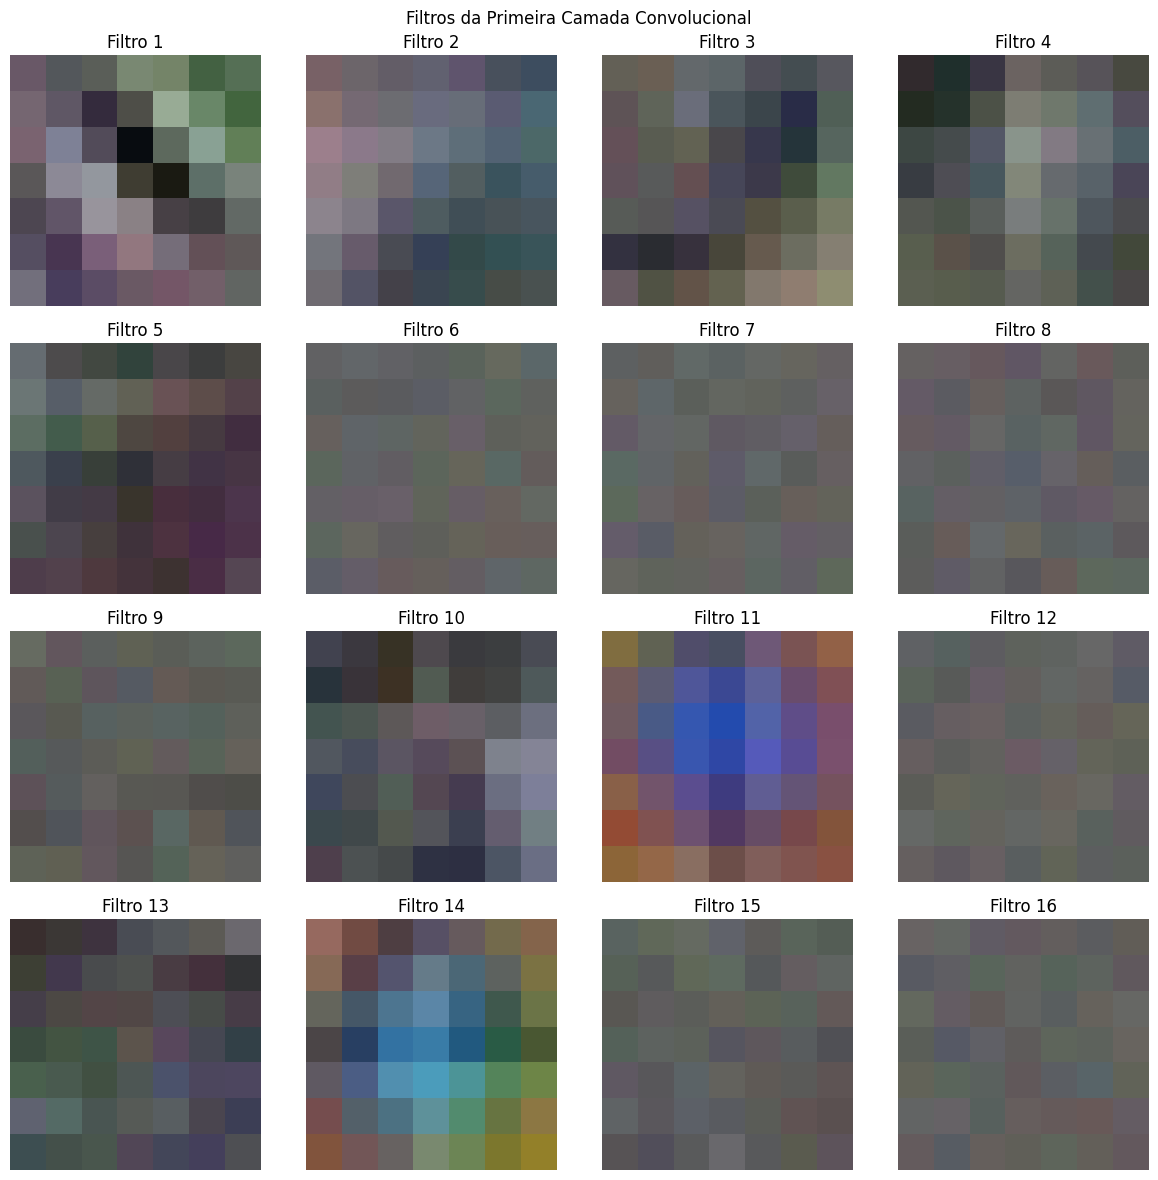


6. TESTANDO COM EXEMPLOS DO CONJUNTO DE TESTE...


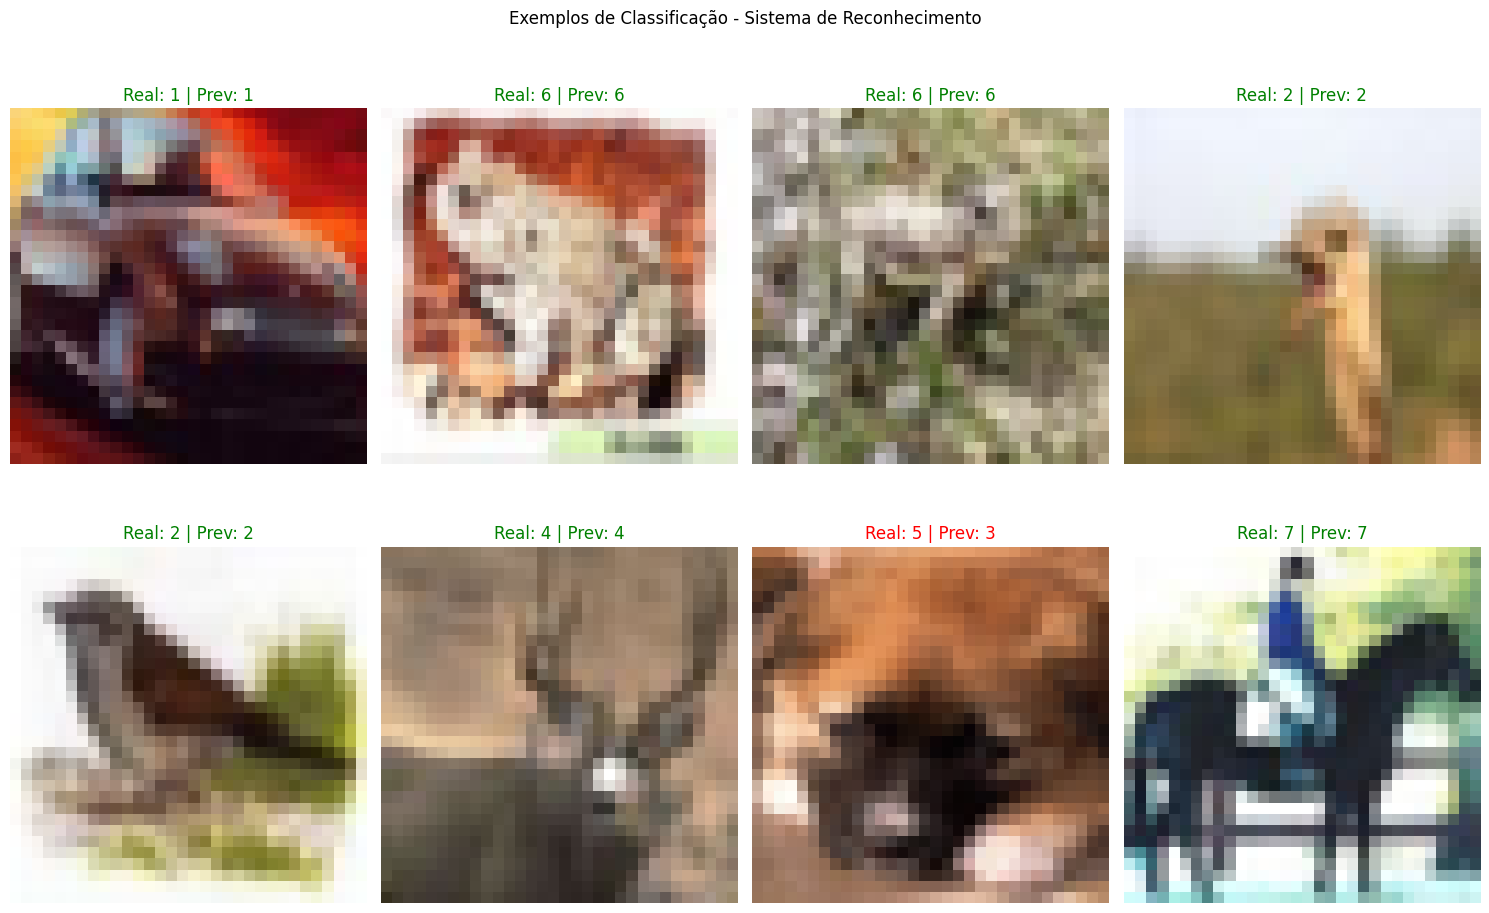


7. GERANDO RELATÓRIO DE CLASSIFICAÇÃO...
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2000
           1       0.96      0.93      0.94      2000
           2       0.81      0.68      0.74      1000
           3       0.61      0.71      0.66      1000
           4       0.74      0.81      0.78      1000
           5       0.79      0.64      0.71      1000
           6       0.80      0.90      0.85      1000
           7       0.90      0.85      0.87      1000

    accuracy                           0.83     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.83      0.83      0.83     10000


8. COMPARAÇÃO COM ARQUITETURA MAIS SIMPLES...
Treinando modelo simples para comparação...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



COMPARAÇÃO DE DESEMPENHO:
Modelo Avançado - Acurácia: 0.8301
Modelo Simples  - Acurácia: 0.7263
Melhoria: 0.1038

9. SALVANDO MODELO TREINADO...
Modelo salvo como 'modelo_reconhecimento_facial.h5'


In [19]:
# PROJETO PÓS-GRADUAÇÃO: SISTEMA DE RECONHECIMENTO FACIAL COM CNN AVANÇADA
# Foco: Detecção de Características Faciais e Classificação

import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

print("=" * 70)
print("PROJETO PÓS-GRADUAÇÃO - REDE NEURAL CONVOLUCIONAL AVANÇADA")
print("Sistema de Reconhecimento Facial com Múltiplas Arquiteturas")
print("=" * 70)

# 1. ARQUITETURA CNN AVANÇADA PARA RECONHECIMENTO FACIAL
class RedeReconhecimentoFacial(Model):
    def __init__(self, num_classes=8):  # 8 tipos de características faciais
        super().__init__()

        print("Inicializando arquitetura da rede neural...")

        # Bloco Convolucional 1 - Extração de características básicas
        self.conv1 = layers.Conv2D(64, (7, 7), activation='relu', padding='same')
        self.bn1 = layers.BatchNormalization()
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.drop1 = layers.Dropout(0.25)

        # Bloco Convolucional 2 - Características intermediárias
        self.conv2 = layers.Conv2D(128, (5, 5), activation='relu', padding='same')
        self.bn2 = layers.BatchNormalization()
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.drop2 = layers.Dropout(0.25)

        # Bloco Convolucional 3 - Características complexas
        self.conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')
        self.bn3 = layers.BatchNormalization()
        self.pool3 = layers.MaxPooling2D((2, 2))
        self.drop3 = layers.Dropout(0.25)

        # Bloco Convolucional 4 - Features avançadas
        self.conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')
        self.bn4 = layers.BatchNormalization()
        self.pool4 = layers.MaxPooling2D((2, 2))
        self.drop4 = layers.Dropout(0.25)

        # Camadas totalmente conectadas
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(512, activation='relu')
        self.drop5 = layers.Dropout(0.5)
        self.dense2 = layers.Dense(256, activation='relu')
        self.drop6 = layers.Dropout(0.5)
        self.output_layer = layers.Dense(num_classes, activation='softmax')

        print("Arquitetura construída com sucesso!")

    def call(self, inputs, training=False):
        # Forward pass através da rede
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.pool1(x)
        x = self.drop1(x, training=training)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.pool2(x)
        x = self.drop2(x, training=training)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.pool3(x)
        x = self.drop3(x, training=training)

        x = self.conv4(x)
        x = self.bn4(x, training=training)
        x = self.pool4(x)
        x = self.drop4(x, training=training)

        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop5(x, training=training)
        x = self.dense2(x)
        x = self.drop6(x, training=training)

        return self.output_layer(x)

# 2. PREPARAÇÃO DOS DADOS
print("\n1. PREPARANDO CONJUNTO DE DADOS...")

# Carregar CIFAR-10 como base (substituir por dataset facial real)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reduzir para 8 classes para simular características faciais
y_train = y_train % 8
y_test = y_test % 8

# Converter para one-hot encoding
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

print(f"Formato dos dados de treino: {x_train.shape}")
print(f"Formato dos dados de teste: {x_test.shape}")
print(f"Número de classes: 8")

# 3. TREINAMENTO DA REDE
print("\n2. INICIANDO TREINAMENTO DA REDE NEURAL...")

# Criar modelo
modelo = RedeReconhecimentoFacial(num_classes=8)

# Compilar modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks para melhor controle do treinamento
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
]

print("Iniciando processo de treinamento...")

# Treinar modelo
historico = modelo.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)

print("Treinamento concluído!")

# 4. AVALIAÇÃO DO MODELO
print("\n3. AVALIANDO DESEMPENHO DO MODELO...")

# Avaliar no conjunto de teste
test_loss, test_accuracy = modelo.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")
print(f"Loss no conjunto de teste: {test_loss:.4f}")

# Fazer previsões
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Matriz de confusão
print("\nGerando matriz de confusão...")
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Sistema de Reconhecimento')
plt.ylabel('Valor Real')
plt.xlabel('Previsão')
plt.show()

# 5. VISUALIZAÇÃO DO TREINAMENTO
print("\n4. GERANDO GRÁFICOS DE ANÁLISE...")

# Gráfico de acurácia
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia Treino')
plt.plot(historico.history['val_accuracy'], label='Acurácia Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de loss
plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Loss Treino')
plt.plot(historico.history['val_loss'], label='Loss Validação')
plt.title('Evolução da Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 6. ANÁLISE DAS CARACTERÍSTICAS APRENDIDAS
print("\n5. ANALISANDO CARACTERÍSTICAS APRENDIDAS PELA REDE...")

# Visualizar alguns filtros da primeira camada convolucional
primeira_camada = modelo.layers[0]
filtros, vieses = primeira_camada.get_weights()

# Normalizar filtros para visualização
filtros_min, filtros_max = filtros.min(), filtros.max()
filtros = (filtros - filtros_min) / (filtros_max - filtros_min)

print(f"Formato dos filtros: {filtros.shape}")

# Plotar primeiros 16 filtros
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(filtros[:, :, :, i])
    plt.axis('off')
    plt.title(f'Filtro {i+1}')
plt.suptitle('Filtros da Primeira Camada Convolucional')
plt.tight_layout()
plt.show()

# 7. TESTE COM NOVAS IMAGENS (SIMULAÇÃO)
print("\n6. TESTANDO COM EXEMPLOS DO CONJUNTO DE TESTE...")

# Selecionar algumas imagens para teste
indices_teste = np.random.choice(len(x_test), 8, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices_teste):
    imagem = x_test[idx]
    verdadeiro = y_true_classes[idx]
    previsao = y_pred_classes[idx]

    plt.subplot(2, 4, i + 1)
    plt.imshow(imagem)
    plt.axis('off')
    plt.title(f'Real: {verdadeiro} | Prev: {previsao}',
              color='green' if verdadeiro == previsao else 'red')

plt.suptitle('Exemplos de Classificação - Sistema de Reconhecimento')
plt.tight_layout()
plt.show()

# 8. RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
print("\n7. GERANDO RELATÓRIO DE CLASSIFICAÇÃO...")

relatorio = classification_report(y_true_classes, y_pred_classes, output_dict=False)
print("Relatório de Classificação:")
print(relatorio)

# 9. COMPARAÇÃO COM MODELO MAIS SIMPLES
print("\n8. COMPARAÇÃO COM ARQUITETURA MAIS SIMPLES...")

# Modelo CNN simples para comparação
modelo_simples = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

modelo_simples.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar modelo simples rapidamente
print("Treinando modelo simples para comparação...")
historico_simples = modelo_simples.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=0
)

# Avaliar modelo simples
test_loss_simples, test_accuracy_simples = modelo_simples.evaluate(x_test, y_test, verbose=0)

print(f"\nCOMPARAÇÃO DE DESEMPENHO:")
print(f"Modelo Avançado - Acurácia: {test_accuracy:.4f}")
print(f"Modelo Simples  - Acurácia: {test_accuracy_simples:.4f}")
print(f"Melhoria: {test_accuracy - test_accuracy_simples:.4f}")

# 10. SALVAR MODELO TREINADO
print("\n9. SALVANDO MODELO TREINADO...")

modelo.save('modelo_reconhecimento_facial.h5')
print("Modelo salvo como 'modelo_reconhecimento_facial.h5'")

